# 1 Load Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# 2 Data Preparation

In [58]:
train_transaction = pd.read_csv('C:/Users/ar194371/Documents/Data Mining/train_transaction.csv')
train_identity = pd.read_csv('C:/Users/ar194371/Documents/Data Mining/train_identity.csv')

test_transaction = pd.read_csv('C:/Users/ar194371/Documents/Data Mining/test_transaction.csv')
test_identity = pd.read_csv('C:/Users/ar194371/Documents/Data Mining/test_identity.csv')

In [5]:
test_identity.columns = train_identity.columns # unify columns of test_identity and train_identity, eg. id-01 to id_01

In [6]:
print('shape of train_transaction is:', train_transaction.shape)
print('shape of test_transaction is:', test_transaction.shape)
print('shape of train_identity is:', train_identity.shape)
print('shape of test_identity is:', test_identity.shape)

shape of train_transaction is: (590540, 394)
shape of test_transaction is: (506691, 393)
shape of train_identity is: (144233, 41)
shape of test_identity is: (141907, 41)


In [7]:
## Function to reduce the DF size
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [8]:
## Reducing memory of train sets
train_transaction = reduce_mem_usage(train_transaction)
train_identity = reduce_mem_usage(train_identity)

Mem. usage decreased to 542.35 Mb (69.4% reduction)
Mem. usage decreased to 25.86 Mb (42.7% reduction)


# 2.2 Drop rows

2.2.1 Train Identity

In [9]:
print('shape before dropping train_identity rows:', train_identity.shape)

shape before dropping train_identity rows: (144233, 41)


In [10]:
total_rows = train_identity.shape[0]
total_cols = train_identity.shape[1]
low_missing_train_id_rows = []      # lower than 50% missing values
many_missing_train_id_rows = []     # more than 50% missing

for row in range(total_rows):
    null_percent = train_identity.iloc[row].isnull().sum() / total_cols
    if(null_percent > 0.5):
        many_missing_train_id_rows.append(row)
    else:
        low_missing_train_id_rows.append(row)

print("number low missing (<= 50%): ", len(low_missing_train_id_rows))
print("number many missing (> 50%): ", len(many_missing_train_id_rows))

number low missing (<= 50%):  134833
number many missing (> 50%):  9400


In [11]:
train_id_row_drop = train_identity.drop(many_missing_train_id_rows)
print('shape after dropping train_identity rows:', train_id_row_drop.shape)

shape after dropping train_identity rows: (134833, 41)


2.2.2 Test Identity

In [12]:
print('shape before dropping test_identity rows:', test_identity.shape)

shape before dropping test_identity rows: (141907, 41)


In [13]:
total_rows = test_identity.shape[0]
total_cols = test_identity.shape[1]
low_missing_test_id_rows = []      # lower than 50% missing values
many_missing_test_id_rows = []     # more than 50% missing

for row in range(total_rows):
    null_percent = test_identity.iloc[row].isnull().sum() / total_cols
    if(null_percent > 0.5):
        many_missing_test_id_rows.append(row)
    else:
        low_missing_test_id_rows.append(row)

print("number low missing (<= 50%): ", len(low_missing_test_id_rows))
print("number many missing (> 50%): ", len(many_missing_test_id_rows))

number low missing (<= 50%):  131078
number many missing (> 50%):  10829


In [14]:
test_id_row_drop = test_identity.drop(many_missing_test_id_rows)
print('shape after dropping test_identity rows:', test_id_row_drop.shape)

shape after dropping test_identity rows: (131078, 41)


2.2.3 Train Transaction

In [13]:
print('shape before dropping train_transaction rows:', train_transaction.shape)

shape before dropping train_transaction rows: (590540, 394)


In [16]:
total_rows = train_transaction.shape[0]
total_cols = train_transaction.shape[1]
low_missing_train_t_rows = []      # lower than 50% missing values
many_missing_train_t_rows = []     # more than 50% missing

for row in range(total_rows):
    null_percent = train_transaction.iloc[row].isnull().sum() / total_cols
    if(null_percent > 0.5):
        many_missing_train_t_rows.append(row)
    else:
        low_missing_train_t_rows.append(row)

print("number low missing (<= 50%): ", len(low_missing_train_t_rows))
print("number many missing (> 50%): ", len(many_missing_train_t_rows))

number low missing (<= 50%):  553287
number many missing (> 50%):  37253


In [17]:
train_transaction_row_drop = train_transaction.drop(many_missing_train_t_rows)
print('shape after dropping train_transaction rows:', train_transaction_row_drop.shape)

shape after dropping train_transaction rows: (553287, 394)


2.2.4 Test Transaction

In [18]:
print('shape before dropping test_transaction rows:', test_transaction.shape)

shape before dropping test_transaction rows: (506691, 393)


In [19]:
total_rows = test_transaction.shape[0]
total_cols = test_transaction.shape[1]
low_missing_test_t_rows = []      # lower than 50% missing values
many_missing_test_t_rows = []     # more than 50% missing

for row in range(total_rows):
    null_percent = test_transaction.iloc[row].isnull().sum() / total_cols
    if(null_percent > 0.5):
        many_missing_test_t_rows.append(row)
    else:
        low_missing_test_t_rows.append(row)

print("number low missing (<= 50%): ", len(low_missing_test_t_rows))
print("number many missing (> 50%): ", len(many_missing_test_t_rows))

number low missing (<= 50%):  499806
number many missing (> 50%):  6885


In [21]:
test_transaction_row_drop = test_transaction.drop(many_missing_test_t_rows)
print('shape after dropping test_transaction rows:', test_transaction_row_drop.shape)

shape after dropping test_transaction rows: (499806, 393)


In [22]:
print('shape of train_transaction_row_drop is:', train_transaction_row_drop.shape)
print('shape of test_transaction_row_drop is:', test_transaction_row_drop.shape)
print('shape of train_identity_row_drop is:', train_id_row_drop.shape)
print('shape of test_identity_row_drop is:', test_id_row_drop.shape)

shape of train_transaction_row_drop is: (553287, 394)
shape of test_transaction_row_drop is: (499806, 393)
shape of train_identity_row_drop is: (134833, 41)
shape of test_identity_row_drop is: (131078, 41)


In [23]:
transaction = pd.concat([train_transaction_row_drop, test_transaction_row_drop])
identity = pd.concat([train_id_row_drop, test_id_row_drop])

In [24]:
transaction_org = transaction
identity_org = identity

In [23]:
#make sure there are no duplicate columns in transaction and identity
trans_col = []
id_col = []
for col in identity.columns:
    id_col.append(col)
for col in transaction.columns:
    trans_col.append(col)
trans_set = [*set(trans_col)]
id_set = [*set(id_col)]

print("no duplicates in transaction:",len(trans_col)==len(trans_set))
print("no duplicates in identity:",len(id_col)==len(id_set))

no duplicates in transaction: True
no duplicates in identity: True


# 2.3 Feature Analysis

2.3.1 Identity

In [25]:
c = (identity.dtypes == 'object')
n = (identity.dtypes != 'object')
cat_id_cols = list(c[c].index) # a list of categorical features of identity
num_id_cols = list(n[n].index) # a list of numerical features of identity

print(cat_id_cols)
print("number categorical identity features: ", len(cat_id_cols), "\n")
print(num_id_cols)
print("number numerical identity features: ", len(num_id_cols))

['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
number categorical identity features:  17 

['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_32']
number numerical identity features:  24


2.3.2 Transaction

In [26]:
c = (transaction.dtypes == 'object')
n = (transaction.dtypes != 'object')
cat_trans_cols = list(c[c].index) # a list of categorical features of transaction
num_trans_cols = list(n[n].index) # a list of numerical features of transaction

print(cat_trans_cols)
print("number categorical transaction features: ", len(cat_trans_cols), "\n")
print(num_trans_cols)
print("number numerical transaction features: ", len(num_trans_cols))

['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']
number categorical transaction features:  14 

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V7

In [27]:
del train_transaction, train_identity, test_transaction, test_identity

# 3 Missing Values

3.1 Identifying Missing Values

In [28]:
print(f'There are {identity.isnull().any().sum()} columns in identity dataset with missing values.')
print(f'There are {transaction.isnull().any().sum()} columns in transaction dataset with missing values.')

There are 30 columns in identity dataset with missing values.
There are 389 columns in transaction dataset with missing values.


In [28]:
identity.isnull().sum()

TransactionID         0
id_01                 0
id_02                 1
id_03            133298
id_04            133298
id_05              5006
id_06              5006
id_07            255697
id_08            255697
id_09            116839
id_10            116839
id_11                 0
id_12                 0
id_13             28399
id_14            114520
id_15                 0
id_16             11832
id_17              2281
id_18            170023
id_19              2379
id_20              2692
id_21            255693
id_22            255680
id_23            255680
id_24            256424
id_25            255740
id_26            255701
id_27            255680
id_28                 0
id_29                 0
id_30            117687
id_31               513
id_32            117654
id_33            121951
id_34            116363
id_35                 0
id_36                 0
id_37                 0
id_38                 0
DeviceType           66
DeviceInfo        32767
dtype: int64

In [29]:
transaction.isnull().sum()

TransactionID          0
isFraud           499806
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              895466
V336              895466
V337              895466
V338              895466
V339              895466
Length: 394, dtype: int64

3.1.1 Missing values for Identity Category Features

In [30]:
low_missing_cat_id_cols = []      # lower than 15% missing values
medium_missing_cat_id_cols = []   # between 15% and 60% missing
many_missing_cat_id_cols = []     # more than 60% missing

for i in cat_id_cols:
    percentage = identity[i].isnull().sum() * 100 / len(identity[i])
    if percentage < 15:
        low_missing_cat_id_cols.append(i)
    elif percentage >= 15 and percentage < 60:
        medium_missing_cat_id_cols.append(i)
    else:
        many_missing_cat_id_cols.append(i)
        
print("category features of identity:")      
print("number low missing (< 15%): ", len(low_missing_cat_id_cols), ",it's: ", low_missing_cat_id_cols)
print("number medium missing (>= 15% and < 60%): ", len(medium_missing_cat_id_cols), ",it's: ", medium_missing_cat_id_cols)
print("number many missing (>= 60%): ", len(many_missing_cat_id_cols), ",it's: ", many_missing_cat_id_cols)

category features of identity:
number low missing (< 15%):  12 ,it's:  ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']
number medium missing (>= 15% and < 60%):  3 ,it's:  ['id_30', 'id_33', 'id_34']
number many missing (>= 60%):  2 ,it's:  ['id_23', 'id_27']


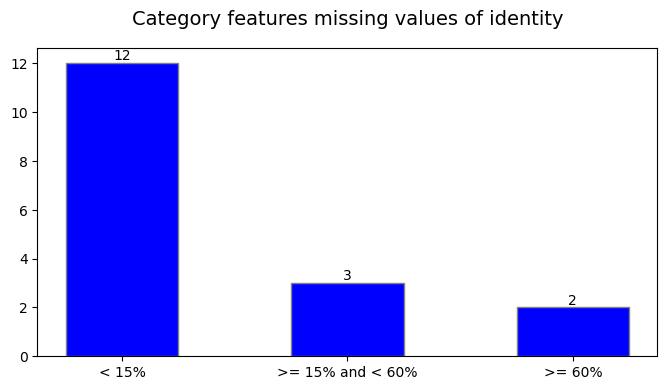

In [31]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
x_data, y_data = ['< 15%', '>= 15% and < 60%', '>= 60%'], [len(low_missing_cat_id_cols), len(medium_missing_cat_id_cols), len(many_missing_cat_id_cols)]
bar = plt.bar(x_data, y_data, 0.5, color='blue',edgecolor='grey')
ax.set_title('Category features missing values of identity',fontsize=14,y=1.05)
for a,b in zip(x_data, y_data): # show data label
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

3.1.2 Missing values for Identity Numerical Features

In [32]:
low_missing_num_id_cols = []      # lower than 15% missing values
medium_missing_num_id_cols = []   # between 15% and 60% missing
many_missing_num_id_cols = []     # more than 60% missing

for i in num_id_cols:
    percentage = identity[i].isnull().sum() * 100 / len(identity[i])
    if percentage < 15:
        low_missing_num_id_cols.append(i)
    elif percentage >= 15 and percentage < 60:
        medium_missing_num_id_cols.append(i)
    else:
        many_missing_num_id_cols.append(i)
        
print("numerical features of identity:")      
print("number low missing (< 15%): ", len(low_missing_num_id_cols), ",it's: ", low_missing_num_id_cols)
print("number medium missing (>= 15% and < 60%): ", len(medium_missing_num_id_cols), ",it's: ", medium_missing_num_id_cols)
print("number many missing (>= 60%): ", len(many_missing_num_id_cols), ",it's: ", many_missing_num_id_cols)

numerical features of identity:
number low missing (< 15%):  10 ,it's:  ['TransactionID', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_17', 'id_19', 'id_20']
number medium missing (>= 15% and < 60%):  6 ,it's:  ['id_03', 'id_04', 'id_09', 'id_10', 'id_14', 'id_32']
number many missing (>= 60%):  8 ,it's:  ['id_07', 'id_08', 'id_18', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26']


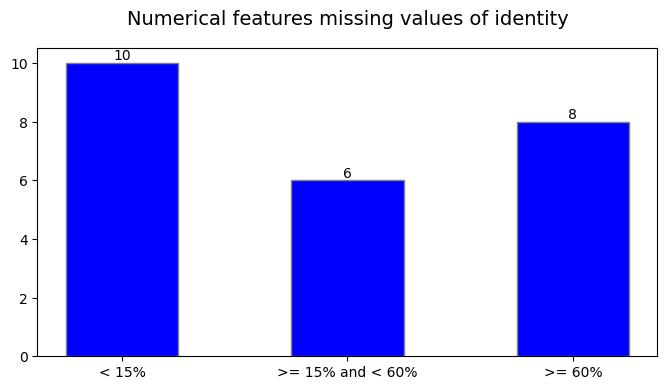

In [33]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
x_data, y_data = ['< 15%', '>= 15% and < 60%', '>= 60%'], [len(low_missing_num_id_cols), len(medium_missing_num_id_cols), len(many_missing_num_id_cols)]
bar = plt.bar(x_data, y_data, 0.5, color='blue',edgecolor='grey')
ax.set_title('Numerical features missing values of identity',fontsize=14,y=1.05)
for a,b in zip(x_data, y_data): # show data label
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

3.1.3 Missing values for Transaction Category Features

In [34]:
low_missing_cat_trans_cols = []      # lower than 15% missing values
medium_missing_cat_trans_cols = []   # between 15% and 60% missing
many_missing_cat_trans_cols = []     # more than 60% missing

for i in cat_trans_cols:
    percentage = transaction[i].isnull().sum() * 100 / len(transaction[i])
    if percentage < 15:
        low_missing_cat_trans_cols.append(i)
    elif percentage >= 15 and percentage < 60:
        medium_missing_cat_trans_cols.append(i)
    else:
        many_missing_cat_trans_cols.append(i)
        
print("cat_trans_cols:")    
print("number low missing: ", len(low_missing_cat_trans_cols), ",it's: ", low_missing_cat_trans_cols)
print("number medium missing: ", len(medium_missing_cat_trans_cols), ",it's: ", medium_missing_cat_trans_cols)
print("number many missing: ", len(many_missing_cat_trans_cols), ",it's: ", many_missing_cat_trans_cols)

cat_trans_cols:
number low missing:  4 ,it's:  ['ProductCD', 'card4', 'card6', 'P_emaildomain']
number medium missing:  8 ,it's:  ['M1', 'M2', 'M3', 'M4', 'M6', 'M7', 'M8', 'M9']
number many missing:  2 ,it's:  ['R_emaildomain', 'M5']


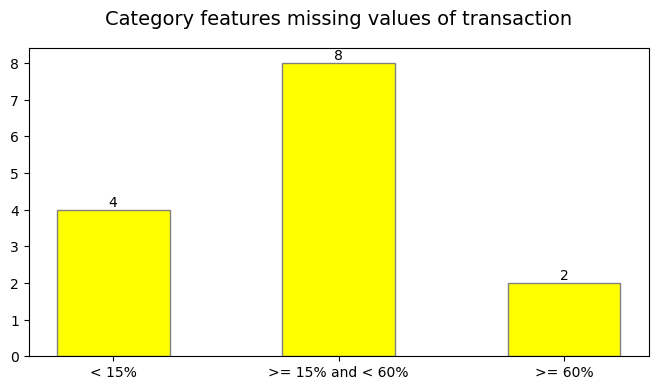

In [35]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
x_data, y_data = ['< 15%', '>= 15% and < 60%', '>= 60%'], [len(low_missing_cat_trans_cols), len(medium_missing_cat_trans_cols), len(many_missing_cat_trans_cols)]
bar = plt.bar(x_data, y_data, 0.5, color='yellow',edgecolor='grey')
ax.set_title('Category features missing values of transaction',fontsize=14,y=1.05)
for a,b in zip(x_data, y_data): # show data label
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

3.1.4 Missing values for Transaction Numerical Features

In [35]:
low_missing_num_trans_cols = []      # lower than 15% missing values
medium_missing_num_trans_cols = []   # between 15% and 60% missing
many_missing_num_trans_cols = []     # more than 60% missing

for i in num_trans_cols:
    percentage = transaction[i].isnull().sum() * 100 / len(transaction[i])
    if percentage < 15:
        low_missing_num_trans_cols.append(i)
    elif percentage >= 15 and percentage < 60:
        medium_missing_num_trans_cols.append(i)
    else:
        many_missing_num_trans_cols.append(i)
        
print("numerical features of identity:")      
print("number low missing (< 15%): ", len(low_missing_num_trans_cols), ",it's: ", low_missing_num_trans_cols)
print("number medium missing (>= 15% and < 60%): ", len(medium_missing_num_trans_cols), ",it's: ", medium_missing_num_trans_cols)
print("number many missing (>= 60%): ", len(many_missing_num_trans_cols), ",it's: ", many_missing_num_trans_cols)

numerical features of identity:
number low missing (< 15%):  177 ,it's:  ['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127

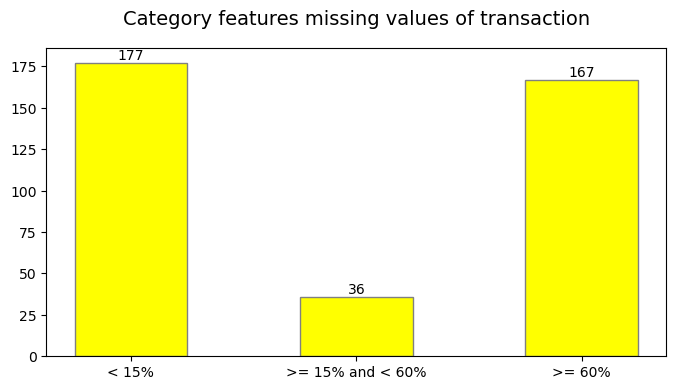

In [37]:
fig, ax = plt.subplots(figsize=(8,4), dpi=100)
x_data, y_data = ['< 15%', '>= 15% and < 60%', '>= 60%'], [len(low_missing_num_trans_cols), len(medium_missing_num_trans_cols), len(many_missing_num_trans_cols)]
bar = plt.bar(x_data, y_data, 0.5, color='yellow',edgecolor='grey')
ax.set_title('Category features missing values of transaction',fontsize=14,y=1.05)
for a,b in zip(x_data, y_data): # show data label
    plt.text(a,b,
             b,
             ha='center', 
             va='bottom',
            )

In [36]:
#Summary so far:

# we have 2 dataframes:   transaction and identity

####################################################################
# features:

# identity:        17 categorical and  24 numerical features
# transaction:     14 categorical and 379 numerical features
####################################################################
# missing values:

# cat_id_cols:        11 low,    4 medium,    2 many 
# num_id_cols:        10 low,    6 medium,    8 many

# cat_trans_cols:      4 low,    8 medium,    2 many 
# num_trans_cols:    177 low,   35 medium,  167 many
####################################################################

# 3.2 Dealing with Missing Values

3.2.1 Numerical Features

3.2.1.1 Drop numerical features with many missing values

In [37]:
print("shape before dropping num_trans_cols: ", transaction.shape[1])        
transaction = transaction.drop(columns = many_missing_num_trans_cols)
print("number of columns of transaction after dropping num_trans_cols: ", transaction.shape[1])    


print("shape before dropping num_id_cols: ", identity.shape[1])        
identity = identity.drop(columns = many_missing_num_id_cols)
print("number of columns of identity after dropping num_id_cols: ", identity.shape[1])


# because we dropped some numerical columns from the dataframe,
# we must create the list 'num_trans_cols' and
# 'num_id_cols' again such that the dropped cols are no longer in them
n = (transaction.dtypes != 'object')
num_trans_cols = list(n[n].index) 

n = (identity.dtypes != 'object')
num_id_cols = list(n[n].index) 

shape before dropping num_trans_cols:  394
number of columns of transaction after dropping num_trans_cols:  227
shape before dropping num_id_cols:  41
number of columns of identity after dropping num_id_cols:  33


3.2.1.2 Impute numerical features with low missing values

identity

In [38]:
print("values before imputing: ", identity[low_missing_num_id_cols])

values before imputing:          TransactionID  id_01     id_02  id_05  id_06  id_11  id_13  id_17  \
0             2987004    0.0   70787.0    NaN    NaN  100.0    NaN  166.0   
1             2987008   -5.0   98945.0    0.0   -5.0  100.0   49.0  166.0   
2             2987010   -5.0  191631.0    0.0    0.0  100.0   52.0  121.0   
3             2987011   -5.0  221832.0    0.0   -6.0  100.0   52.0  225.0   
4             2987016    0.0    7460.0    1.0    0.0  100.0    NaN  166.0   
...               ...    ...       ...    ...    ...    ...    ...    ...   
141902        4170230  -20.0  473365.0    0.0    0.0  100.0   27.0  225.0   
141903        4170233   -5.0  489917.0   -4.0  -32.0  100.0   27.0  225.0   
141904        4170234   -5.0  110081.0   22.0  -31.0  100.0   27.0  166.0   
141905        4170236  -45.0  266704.0   -3.0  -10.0  100.0   27.0  225.0   
141906        4170239  -10.0  692090.0    0.0    0.0  100.0   27.0  225.0   

        id_19  id_20  
0       542.0  144.0  
1   

In [39]:
my_imputer = SimpleImputer(strategy = 'mean') 
my_imputer.fit(identity[low_missing_num_id_cols])

identity[low_missing_num_id_cols] = my_imputer.transform(identity[low_missing_num_id_cols])

In [40]:
print("values after imputing: ", identity[low_missing_num_id_cols])

values after imputing:          TransactionID  id_01     id_02      id_05      id_06  id_11  \
0           2987004.0    0.0   70787.0   1.483904  -6.954405  100.0   
1           2987008.0   -5.0   98945.0   0.000000  -5.000000  100.0   
2           2987010.0   -5.0  191631.0   0.000000   0.000000  100.0   
3           2987011.0   -5.0  221832.0   0.000000  -6.000000  100.0   
4           2987016.0    0.0    7460.0   1.000000   0.000000  100.0   
...               ...    ...       ...        ...        ...    ...   
141902      4170230.0  -20.0  473365.0   0.000000   0.000000  100.0   
141903      4170233.0   -5.0  489917.0  -4.000000 -32.000000  100.0   
141904      4170234.0   -5.0  110081.0  22.000000 -31.000000  100.0   
141905      4170236.0  -45.0  266704.0  -3.000000 -10.000000  100.0   
141906      4170239.0  -10.0  692090.0   0.000000   0.000000  100.0   

            id_13  id_17  id_19  id_20  
0       43.563702  166.0  542.0  144.0  
1       49.000000  166.0  621.0  500.0  


transaction

In [41]:
print("values before imputing: ", transaction[low_missing_num_trans_cols])

values before imputing:          TransactionID  TransactionDT  TransactionAmt  card1  card2  card3  \
0             2987000          86400          68.500  13926    NaN  150.0   
1             2987001          86401          29.000   2755  404.0  150.0   
2             2987002          86469          59.000   4663  490.0  150.0   
3             2987003          86499          50.000  18132  567.0  150.0   
4             2987004          86506          50.000   4497  514.0  150.0   
...               ...            ...             ...    ...    ...    ...   
506686        4170235       34214279          94.679  13832  375.0  185.0   
506687        4170236       34214287          12.173   3154  408.0  185.0   
506688        4170237       34214326          49.000  16661  490.0  150.0   
506689        4170238       34214337         202.000  16621  516.0  150.0   
506690        4170239       34214345          24.346   5713  168.0  144.0   

        card5  addr1  addr2   C1  ...   V312     V

In [42]:
my_imputer = SimpleImputer(strategy = 'mean') 
my_imputer.fit(transaction[low_missing_num_trans_cols])

transaction[low_missing_num_trans_cols] = my_imputer.transform(transaction[low_missing_num_trans_cols])

In [43]:
print("values after imputing: ", transaction[low_missing_num_trans_cols])

values after imputing:          TransactionID  TransactionDT  TransactionAmt    card1       card2  \
0           2987000.0        86400.0          68.500  13926.0  363.333665   
1           2987001.0        86401.0          29.000   2755.0  404.000000   
2           2987002.0        86469.0          59.000   4663.0  490.000000   
3           2987003.0        86499.0          50.000  18132.0  567.000000   
4           2987004.0        86506.0          50.000   4497.0  514.000000   
...               ...            ...             ...      ...         ...   
506686      4170235.0     34214279.0          94.679  13832.0  375.000000   
506687      4170236.0     34214287.0          12.173   3154.0  408.000000   
506688      4170237.0     34214326.0          49.000  16661.0  490.000000   
506689      4170238.0     34214337.0         202.000  16621.0  516.000000   
506690      4170239.0     34214345.0          24.346   5713.0  168.000000   

        card3  card5       addr1      addr2   C1  .

3.2.1.3 Impute numerical features with medium missing values

identity

In [44]:
print("values before imputing: ", identity[medium_missing_num_id_cols])

my_imputer = SimpleImputer(strategy = 'median') 
my_imputer.fit(identity[medium_missing_num_id_cols])

identity[medium_missing_num_id_cols] = my_imputer.transform(identity[medium_missing_num_id_cols])

values before imputing:          id_03  id_04  id_09  id_10  id_14  id_32
0         NaN    NaN    NaN    NaN -480.0   32.0
1         NaN    NaN    NaN    NaN -300.0   32.0
2         0.0    0.0    0.0    0.0    NaN    NaN
3         NaN    NaN    NaN    NaN    NaN    NaN
4         0.0    0.0    0.0    0.0 -300.0   24.0
...       ...    ...    ...    ...    ...    ...
141902    NaN    NaN    NaN    NaN    NaN    NaN
141903    0.0    0.0    0.0    0.0    NaN    NaN
141904    NaN    NaN    NaN    NaN -300.0   32.0
141905    NaN    NaN    NaN    NaN    NaN    NaN
141906    0.0    0.0    0.0    0.0    NaN    NaN

[265911 rows x 6 columns]


In [45]:
print("values after imputing: ", identity[medium_missing_num_id_cols])

values after imputing:          id_03  id_04  id_09  id_10  id_14  id_32
0         0.0    0.0    0.0    0.0 -480.0   32.0
1         0.0    0.0    0.0    0.0 -300.0   32.0
2         0.0    0.0    0.0    0.0 -300.0   24.0
3         0.0    0.0    0.0    0.0 -300.0   24.0
4         0.0    0.0    0.0    0.0 -300.0   24.0
...       ...    ...    ...    ...    ...    ...
141902    0.0    0.0    0.0    0.0 -300.0   24.0
141903    0.0    0.0    0.0    0.0 -300.0   24.0
141904    0.0    0.0    0.0    0.0 -300.0   32.0
141905    0.0    0.0    0.0    0.0 -300.0   24.0
141906    0.0    0.0    0.0    0.0 -300.0   24.0

[265911 rows x 6 columns]


transaction

In [46]:
print("values before imputing: ", transaction[medium_missing_num_trans_cols])
my_imputer = SimpleImputer(strategy = 'median') 
my_imputer.fit(transaction[medium_missing_num_trans_cols])

transaction[medium_missing_num_trans_cols] = my_imputer.transform(transaction[medium_missing_num_trans_cols])

values before imputing:          isFraud  dist1     D2    D3    D4    D5    D11   V1   V2   V3  ...  \
0           0.0   19.0    NaN  13.0   NaN   NaN   13.0  1.0  1.0  1.0  ...   
1           0.0    NaN    NaN   NaN   0.0   NaN    NaN  NaN  NaN  NaN  ...   
2           0.0  287.0    NaN   NaN   0.0   NaN  315.0  1.0  1.0  1.0  ...   
3           0.0    NaN  112.0   0.0  94.0   0.0    NaN  NaN  NaN  NaN  ...   
4           0.0    NaN    NaN   NaN   NaN   NaN    NaN  NaN  NaN  NaN  ...   
...         ...    ...    ...   ...   ...   ...    ...  ...  ...  ...  ...   
506686      NaN    NaN    NaN   NaN   0.0   NaN    NaN  NaN  NaN  NaN  ...   
506687      NaN    NaN   16.0  16.0  16.0  16.0    NaN  NaN  NaN  NaN  ...   
506688      NaN    NaN    NaN   NaN   0.0   NaN    0.0  1.0  1.0  1.0  ...   
506689      NaN    NaN    NaN   NaN   0.0   NaN    0.0  1.0  1.0  1.0  ...   
506690      NaN    NaN    NaN   NaN   0.0   NaN    NaN  NaN  NaN  NaN  ...   

        V43  V44  V45  V46  V47  V48  

In [87]:
print("values after imputing: ", identity[medium_missing_num_id_cols])


values after imputing:          id_03  id_04  id_09  id_10  id_14  id_32
0         0.0    0.0    0.0    0.0 -480.0   32.0
1         0.0    0.0    0.0    0.0 -300.0   32.0
2         0.0    0.0    0.0    0.0 -300.0   24.0
3         0.0    0.0    0.0    0.0 -300.0   24.0
4         0.0    0.0    0.0    0.0 -300.0   24.0
...       ...    ...    ...    ...    ...    ...
141902    0.0    0.0    0.0    0.0 -300.0   24.0
141903    0.0    0.0    0.0    0.0 -300.0   24.0
141904    0.0    0.0    0.0    0.0 -300.0   32.0
141905    0.0    0.0    0.0    0.0 -300.0   24.0
141906    0.0    0.0    0.0    0.0 -300.0   24.0

[265911 rows x 6 columns]


transaction

In [50]:
print("values before imputing: ", transaction[medium_missing_num_trans_cols])
my_imputer = SimpleImputer(strategy = 'median') 
my_imputer.fit(transaction[medium_missing_num_trans_cols])

transaction[medium_missing_num_trans_cols] = my_imputer.transform(transaction[medium_missing_num_trans_cols])

values before imputing:          isFraud  dist1     D2    D3    D4    D5    D11   V1   V2   V3  ...  \
0           0.0   19.0  103.0  13.0  23.0   9.0   13.0  1.0  1.0  1.0  ...   
1           0.0    8.0  103.0   8.0   0.0   9.0   69.0  1.0  1.0  1.0  ...   
2           0.0  287.0  103.0   8.0   0.0   9.0  315.0  1.0  1.0  1.0  ...   
3           0.0    8.0  112.0   0.0  94.0   0.0   69.0  1.0  1.0  1.0  ...   
4           0.0    8.0  103.0   8.0  23.0   9.0   69.0  1.0  1.0  1.0  ...   
...         ...    ...    ...   ...   ...   ...    ...  ...  ...  ...  ...   
506686      0.0    8.0  103.0   8.0   0.0   9.0   69.0  1.0  1.0  1.0  ...   
506687      0.0    8.0   16.0  16.0  16.0  16.0   69.0  1.0  1.0  1.0  ...   
506688      0.0    8.0  103.0   8.0   0.0   9.0    0.0  1.0  1.0  1.0  ...   
506689      0.0    8.0  103.0   8.0   0.0   9.0    0.0  1.0  1.0  1.0  ...   
506690      0.0    8.0  103.0   8.0   0.0   9.0   69.0  1.0  1.0  1.0  ...   

        V43  V44  V45  V46  V47  V48  

In [48]:
print("values after imputing: ", transaction[medium_missing_num_trans_cols])

values after imputing:          isFraud  dist1     D2    D3    D4    D5    D11   V1   V2   V3  ...  \
0           0.0   19.0  103.0  13.0  23.0   9.0   13.0  1.0  1.0  1.0  ...   
1           0.0    8.0  103.0   8.0   0.0   9.0   69.0  1.0  1.0  1.0  ...   
2           0.0  287.0  103.0   8.0   0.0   9.0  315.0  1.0  1.0  1.0  ...   
3           0.0    8.0  112.0   0.0  94.0   0.0   69.0  1.0  1.0  1.0  ...   
4           0.0    8.0  103.0   8.0  23.0   9.0   69.0  1.0  1.0  1.0  ...   
...         ...    ...    ...   ...   ...   ...    ...  ...  ...  ...  ...   
506686      0.0    8.0  103.0   8.0   0.0   9.0   69.0  1.0  1.0  1.0  ...   
506687      0.0    8.0   16.0  16.0  16.0  16.0   69.0  1.0  1.0  1.0  ...   
506688      0.0    8.0  103.0   8.0   0.0   9.0    0.0  1.0  1.0  1.0  ...   
506689      0.0    8.0  103.0   8.0   0.0   9.0    0.0  1.0  1.0  1.0  ...   
506690      0.0    8.0  103.0   8.0   0.0   9.0   69.0  1.0  1.0  1.0  ...   

        V43  V44  V45  V46  V47  V48  V

3.2.1.4 Final check

In [49]:
print(identity[num_id_cols].isnull().sum().sum())
print(transaction[num_trans_cols].isnull().sum().sum())

0
0


Reduce memory

In [103]:
#  this function detects all the numerical columns,
#  that can be converted to a smaller datatype.
def detect_num_cols_to_shrink(list_of_num_cols, dataframe):
    convert_to_int8 = []
    convert_to_int16 = []
    convert_to_int32 = []
    convert_to_float32 = []

    for col in list_of_num_cols:
        dtype_str = str(dataframe[col].dtype)

        if dtype_str in ['int8', 'int16', 'int32', 'int64']:
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 255:
                convert_to_int8.append(col)
            elif diff < 65535:
                convert_to_int16.append(col)
            elif diff < 4294967295:
                convert_to_int32.append(col)

        elif dtype_str in ['float16', 'float32', 'float64']:
            describe_object = dataframe[col].describe()
            minimum = describe_object[3]
            maximum = describe_object[7]
            diff = abs(maximum - minimum)

            if diff < 4294967295:
                convert_to_float32.append(col)

    # Convert columns to desired data types
    dataframe[convert_to_int8] = dataframe[convert_to_int8].astype('int8')
    dataframe[convert_to_int16] = dataframe[convert_to_int16].astype('int16')
    dataframe[convert_to_int32] = dataframe[convert_to_int32].astype('int32')
    dataframe[convert_to_float32] = dataframe[convert_to_float32].astype('float32')

    list_of_lists = [convert_to_int8, convert_to_int16, convert_to_int32, convert_to_float32]

    return list_of_lists


In [104]:
num_cols_to_shrink_trans = detect_num_cols_to_shrink(num_trans_cols, transaction)

convert_to_int8 = num_cols_to_shrink_trans[0]
convert_to_int16 = num_cols_to_shrink_trans[1]
convert_to_int32 = num_cols_to_shrink_trans[2]
convert_to_float32 = num_cols_to_shrink_trans[3]

transaction[convert_to_int8] = transaction[convert_to_int8].astype('int8')
transaction[convert_to_int16] = transaction[convert_to_int16].astype('int16')
transaction[convert_to_int32] = transaction[convert_to_int32].astype('int32')
transaction[convert_to_float32] = transaction[convert_to_float32].astype('float32')

In [105]:
for col in convert_to_int16:
    transaction[col] = transaction[col].astype('int16')

for col in convert_to_int32:
    transaction[col] = transaction[col].astype('int32')

for col in convert_to_float32:
    transaction[col] = transaction[col].astype('float32')


In [106]:
# Assuming detect_num_cols_to_shrink function is defined and imported

# Detect columns to shrink for the 'identity' DataFrame
num_cols_to_shrink_id = detect_num_cols_to_shrink(num_id_cols, identity)

# Extract lists of columns to convert
convert_to_int8 = num_cols_to_shrink_id[0]
convert_to_int16 = num_cols_to_shrink_id[1]
convert_to_int32 = num_cols_to_shrink_id[2]
convert_to_float32 = num_cols_to_shrink_id[3]

# Convert columns to the desired data types
for col in convert_to_int8:
    identity[col] = identity[col].astype('int8')

for col in convert_to_int16:
    identity[col] = identity[col].astype('int16')

for col in convert_to_int32:
    identity[col] = identity[col].astype('int32')

for col in convert_to_float32:
    identity[col] = identity[col].astype('float32')


3.2.2 Category Features

3.2.2.1 Drop category features with many missing values

In [107]:
# Print shape before dropping columns
print("Shape before dropping many_missing_cat_trans_cols:", transaction.shape)

# Drop columns from transaction if they exist
transaction = transaction.drop(columns=many_missing_cat_trans_cols, errors='ignore')

# Print shape after dropping columns
print("Shape after dropping many_missing_cat_trans_cols:", transaction.shape)

# Print shape before dropping columns
print("Shape before dropping many_missing_cat_id_cols:", identity.shape)

# Drop columns from identity if they exist
identity = identity.drop(columns=many_missing_cat_id_cols, errors='ignore')

# Print shape after dropping columns
print("Shape after dropping many_missing_cat_id_cols:", identity.shape)

# Update cat_trans_cols and cat_id_cols
cat_trans_cols = list(transaction.select_dtypes(include='object').columns)
cat_id_cols = list(identity.select_dtypes(include='object').columns)

print("Updated cat_trans_cols:", cat_trans_cols)
print("Updated cat_id_cols:", cat_id_cols)

Shape before dropping many_missing_cat_trans_cols: (1053093, 225)
Shape after dropping many_missing_cat_trans_cols: (1053093, 225)
Shape before dropping many_missing_cat_id_cols: (265911, 31)
Shape after dropping many_missing_cat_id_cols: (265911, 31)
Updated cat_trans_cols: []
Updated cat_id_cols: []


In [108]:
print("Remaining columns in transaction:", transaction.columns)
print("Remaining columns in identity:", identity.columns)


Remaining columns in transaction: Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=225)
Remaining columns in identity: Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16',
       'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')


In [109]:
cat_trans_cols = list(transaction.select_dtypes(include='object').columns)
cat_id_cols = list(identity.select_dtypes(include='object').columns)


3.2.2.2 Label-Encode features with high cardinality

identity

In [110]:
print("cat_id_cols:", cat_id_cols)
print("Shape of 'identity':", identity.shape)

cat_id_cols: []
Shape of 'identity': (265911, 31)


In [111]:
for col in cat_id_cols:
    print(col, identity[col].nunique())

As we can see there two groups of cardinality: low cardinality with (2,4) unique values, and comparibly high cardinality with (87,172,461,2799) unique values.

In [112]:
low_card_id_cols =  ["id_12", "id_15", "id_16", "id_28", "id_29", "id_34", "id_35", "id_36", "id_37", "id_38", "DeviceType"]
high_card_id_cols = ["id_30", "id_31", "id_33", "DeviceInfo"]

In [113]:
for i in cat_id_cols:
    most_frequent_value = identity[i].mode()[0]
    print("For column: ", i, "the most frequent value is: ", most_frequent_value)
    identity[i].fillna(most_frequent_value, inplace = True)

transaction

In [114]:
for col in cat_trans_cols:
    print(col, transaction[col].nunique())

As we can see there are two groups of cardinality: low cardinality with (2,3,4,5) unique values, and comparibly high cardinality with 60 unique values.

In [115]:
low_card_trans_cols = ["ProductCD", "card4", "card6", "M1", "M2", "M3", "M4", "M6", "M7", "M8", "M9"]
high_card_trans_cols = ["P_emaildomain"]

In [116]:
for i in cat_trans_cols:
    most_frequent_value = transaction[i].mode()[0]
    print("For column: ", i, "the most frequent value is: ", most_frequent_value)
    transaction[i].fillna(most_frequent_value, inplace = True)

3.2.2.3 Onehot-Encode features with low cardinality

identity

In [117]:
print("shape before encoding: ", identity.shape)
print("columns to encode: ", low_card_id_cols)

# this line does the onehot encoding
low_card_id_encoded = pd.get_dummies(identity[low_card_id_cols], dummy_na = False)
identity.drop(columns = low_card_id_cols, inplace = True)


print("shape after encoding: ", identity.shape)

shape before encoding:  (265911, 31)
columns to encode:  ['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType']
shape after encoding:  (265911, 20)


transaction

In [118]:
print("shape before encoding: ", transaction.shape)
print("columns to encode: ", low_card_trans_cols)

# this line does the onehot encoding
low_card_trans_encoded = pd.get_dummies(transaction[low_card_trans_cols], dummy_na = False)
transaction.drop(columns = low_card_trans_cols, inplace = True)


print("shape after encoding: ", transaction.shape)

shape before encoding:  (1053093, 225)
columns to encode:  ['ProductCD', 'card4', 'card6', 'M1', 'M2', 'M3', 'M4', 'M6', 'M7', 'M8', 'M9']
shape after encoding:  (1053093, 214)


3.2.2.3 Final check

In [119]:
print(identity.isnull().sum().sum())
print(transaction.isnull().sum().sum())

1063638
1053093


3.2.3 Bar Chart of the Change in Means

identity

In [120]:
identity_org = identity_org[identity.columns]

In [121]:
identity = identity.apply(pd.to_numeric, errors='coerce')
identity_org = identity_org.apply(pd.to_numeric, errors='coerce')


identity_mean = identity.mean()
identity_org_mean = identity_org.mean()

In [85]:
# % change in means of columns before and after dropping and imuputing missing-value rows
change_in_means_id = (((identity_mean - identity_org_mean) / identity_org_mean) * 100).round(2)
change_in_means_id

TransactionID     0.00
id_01             0.00
id_02             0.00
id_03           -50.13
id_04           -50.13
id_05            -0.00
id_06            -0.00
id_09           -43.94
id_10           -43.94
id_11             0.00
id_13            -0.00
id_14            -5.56
id_17            -0.00
id_19            -0.00
id_20             0.00
id_30              NaN
id_31              NaN
id_32            -3.98
id_33              NaN
DeviceInfo         NaN
dtype: float64

In [122]:
pd.set_option('display.float_format',lambda x: '%.2f' % x) # cancel the scientific notation
identity_mean # current identity

TransactionID   3599229.50
id_01               -10.09
id_02            177836.70
id_03                 0.03
id_04                -0.04
id_05                 1.48
id_06                -6.95
id_09                 0.05
id_10                -0.15
id_11                99.74
id_13                43.56
id_14              -325.34
id_17               188.90
id_19               353.25
id_20               405.06
id_30                  NaN
id_31                  NaN
id_32                25.32
id_33                  NaN
DeviceInfo             inf
dtype: float64

In [123]:
identity_org_mean # original identity

TransactionID   3599229.39
id_01               -10.09
id_02            177836.69
id_03                 0.06
id_04                -0.07
id_05                 1.48
id_06                -6.95
id_09                 0.08
id_10                -0.27
id_11                99.74
id_13                43.56
id_14              -344.51
id_17               188.90
id_19               353.25
id_20               405.06
id_30                  NaN
id_31                  NaN
id_32                26.37
id_33                  NaN
DeviceInfo             inf
dtype: float64

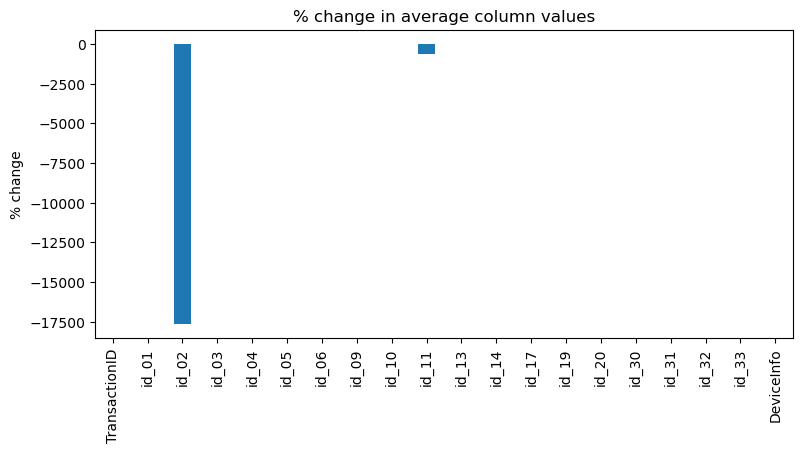

In [126]:
# Assuming change_in_means_id is a Pandas DataFrame or Series

# Example calculation (replace this with your actual calculation)
change_in_means_id = identity.mean() / identity.mean().shift(1) - 1

# Plotting
plt.figure(figsize=(9, 4))
change_in_means_id.plot.bar(title='% change in average column values')
plt.ylabel('% change')
plt.show()


transaction

In [127]:
transaction_org = transaction_org[transaction.columns]

In [128]:
transaction = transaction.apply(pd.to_numeric, errors='coerce')
transaction_org = transaction_org.apply(pd.to_numeric, errors='coerce')

transaction_mean = transaction.mean()
transaction_org_mean = transaction_org.mean()

Compare the mean of current transaction and orginal transaction

In [129]:
# % change in means of columns before and after dropping and imuputing missing-value rows
change_in_means_trans = ((transaction_mean - transaction_org_mean) / transaction_org_mean * 100).round(2)
change_in_means_trans

TransactionID      0.00
isFraud          -47.46
TransactionDT     -0.00
TransactionAmt     0.00
card1             -0.00
                  ...  
V317              -0.00
V318               0.00
V319              -0.00
V320              -0.00
V321              -0.00
Length: 214, dtype: float64

In [130]:
transaction_mean # current transaction

TransactionID     3586295.00
isFraud                 0.02
TransactionDT    16729880.00
TransactionAmt        134.56
card1                9924.84
                     ...    
V317                  161.77
V318                  112.80
V319                   22.99
V320                   44.73
V321                   32.73
Length: 214, dtype: float64

In [131]:
transaction_org_mean # original transaction

TransactionID     3586294.07
isFraud                 0.04
TransactionDT    16729881.28
TransactionAmt        134.56
card1                9924.84
                     ...    
V317                  161.77
V318                  112.80
V319                   22.99
V320                   44.73
V321                   32.73
Length: 214, dtype: float64

Text(0, 0.5, '% change')

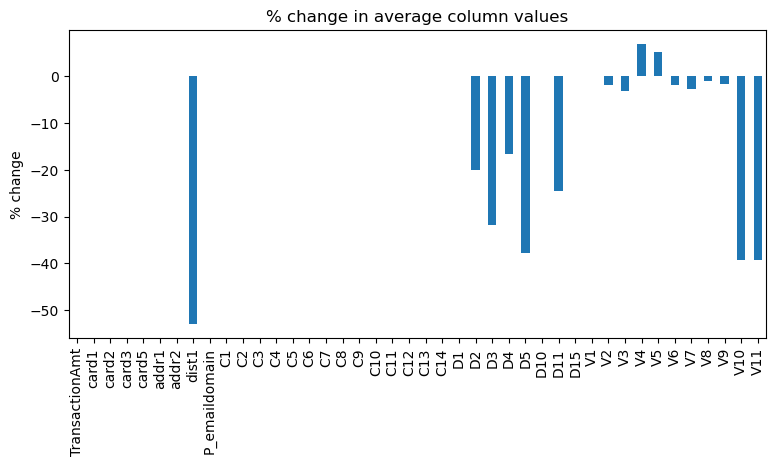

In [132]:
plt.figure(figsize=(9, 4))
change_in_means_trans[3:45].plot.bar(title='% change in average column values', )
plt.ylabel('% change')

3.3 Concat Encoded Dataframes


In [133]:
transaction_concatted = pd.concat([transaction, low_card_trans_encoded], axis = 1)
print(transaction_concatted.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1053093 entries, 0 to 506690
Columns: 225 entries, TransactionID to M9
dtypes: float32(213), float64(12)
memory usage: 960.1 MB
None


In [134]:
identity_concatted = pd.concat([identity, low_card_id_encoded], axis = 1)
print(identity_concatted.info())

<class 'pandas.core.frame.DataFrame'>
Index: 265911 entries, 0 to 141906
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  265911 non-null  float32
 1   id_01          265911 non-null  float32
 2   id_02          265911 non-null  float32
 3   id_03          265911 non-null  float32
 4   id_04          265911 non-null  float32
 5   id_05          265911 non-null  float32
 6   id_06          265911 non-null  float32
 7   id_09          265911 non-null  float32
 8   id_10          265911 non-null  float32
 9   id_11          265911 non-null  float32
 10  id_13          265911 non-null  float32
 11  id_14          265911 non-null  float32
 12  id_17          265911 non-null  float32
 13  id_19          265911 non-null  float32
 14  id_20          265911 non-null  float32
 15  id_30          0 non-null       float64
 16  id_31          0 non-null       float64
 17  id_32          265911 non-null  fl

In [135]:
print("transaction_concatted.shape before splitting up: ", transaction_concatted.shape)

# shape of train_transaction_row_drop was (553287, 394), 
# shape of test_transaction_row_drop  was (499806, 393)

train_transaction = transaction_concatted.iloc[0: train_transaction_row_drop.shape[0]]
test_transaction = transaction_concatted.iloc[train_transaction_row_drop.shape[0]:]

print("train_transaction.shape after splitting up: ", train_transaction.shape)
print("test_transaction.shape after splitting up: ", test_transaction.shape)

transaction_concatted.shape before splitting up:  (1053093, 225)
train_transaction.shape after splitting up:  (553287, 225)
test_transaction.shape after splitting up:  (499806, 225)


In [136]:
print("identity_concatted.shape before splitting up: ", identity_concatted.shape)

# shape of train_identity was (134833, 41)
# shape of test_identity was (131078, 41)

train_identity = identity_concatted.iloc[0:train_id_row_drop.shape[0]]
test_identity = identity_concatted.iloc[train_id_row_drop.shape[0]:]

print("train_identity.shape after splitting up: ", train_identity.shape)
print("test_identity.shape after splitting up: ", test_identity.shape)

identity_concatted.shape before splitting up:  (265911, 31)
train_identity.shape after splitting up:  (134833, 31)
test_identity.shape after splitting up:  (131078, 31)


In [137]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

In [138]:

train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
card1                  0
                   ...  
id_35             553287
id_36             553287
id_37             553287
id_38             553287
DeviceType        553287
Length: 255, dtype: int64

In [139]:
test.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
card1                  0
                   ...  
id_35             499806
id_36             499806
id_37             499806
id_38             499806
DeviceType        499806
Length: 255, dtype: int64

In [140]:
train.to_csv('data/train_after_missing_value.csv')
test.to_csv('data/test_after_missing_value.csv')